In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
colnames = ['Frequency','Angle of attack','Chord length','Free-stream velocity','Suction side displacement thickness','Scaled sound pressure level']

In [3]:
data = pd.read_csv('/home/sehbanfazili/Downloads/airfoil_self_noise.dat', sep = '\t',names=colnames,index_col=False)
data.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Frequency                            1503 non-null   int64  
 1   Angle of attack                      1503 non-null   float64
 2   Chord length                         1503 non-null   float64
 3   Free-stream velocity                 1503 non-null   float64
 4   Suction side displacement thickness  1503 non-null   float64
 5   Scaled sound pressure level          1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [5]:
data.describe()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [6]:
data.isnull().sum()

Frequency                              0
Angle of attack                        0
Chord length                           0
Free-stream velocity                   0
Suction side displacement thickness    0
Scaled sound pressure level            0
dtype: int64

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 6 Text major ticklabel objects>)

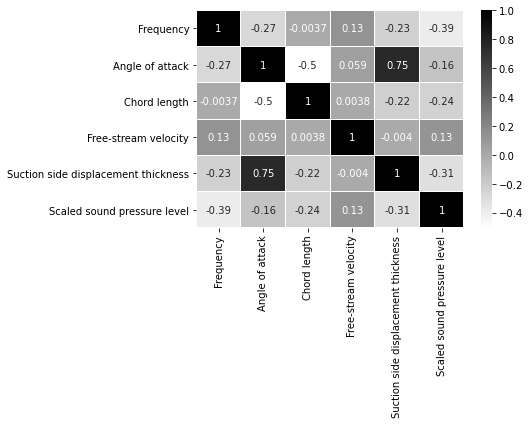

In [64]:
# plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,annot=True,cmap='gist_yarg')
plt.yticks(rotation=0)

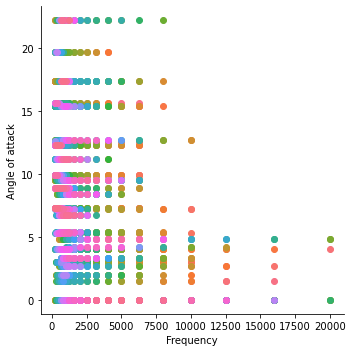

In [8]:
sns.FacetGrid(data, hue="Scaled sound pressure level", size=5).map(plt.scatter, "Frequency", "Angle of attack")

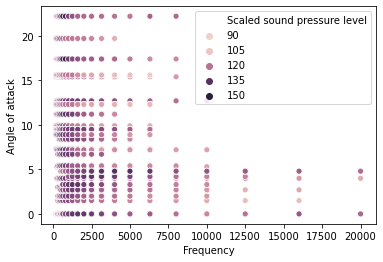

In [9]:
sns.scatterplot(data=data, x="Frequency", y="Angle of attack", hue="Scaled sound pressure level")

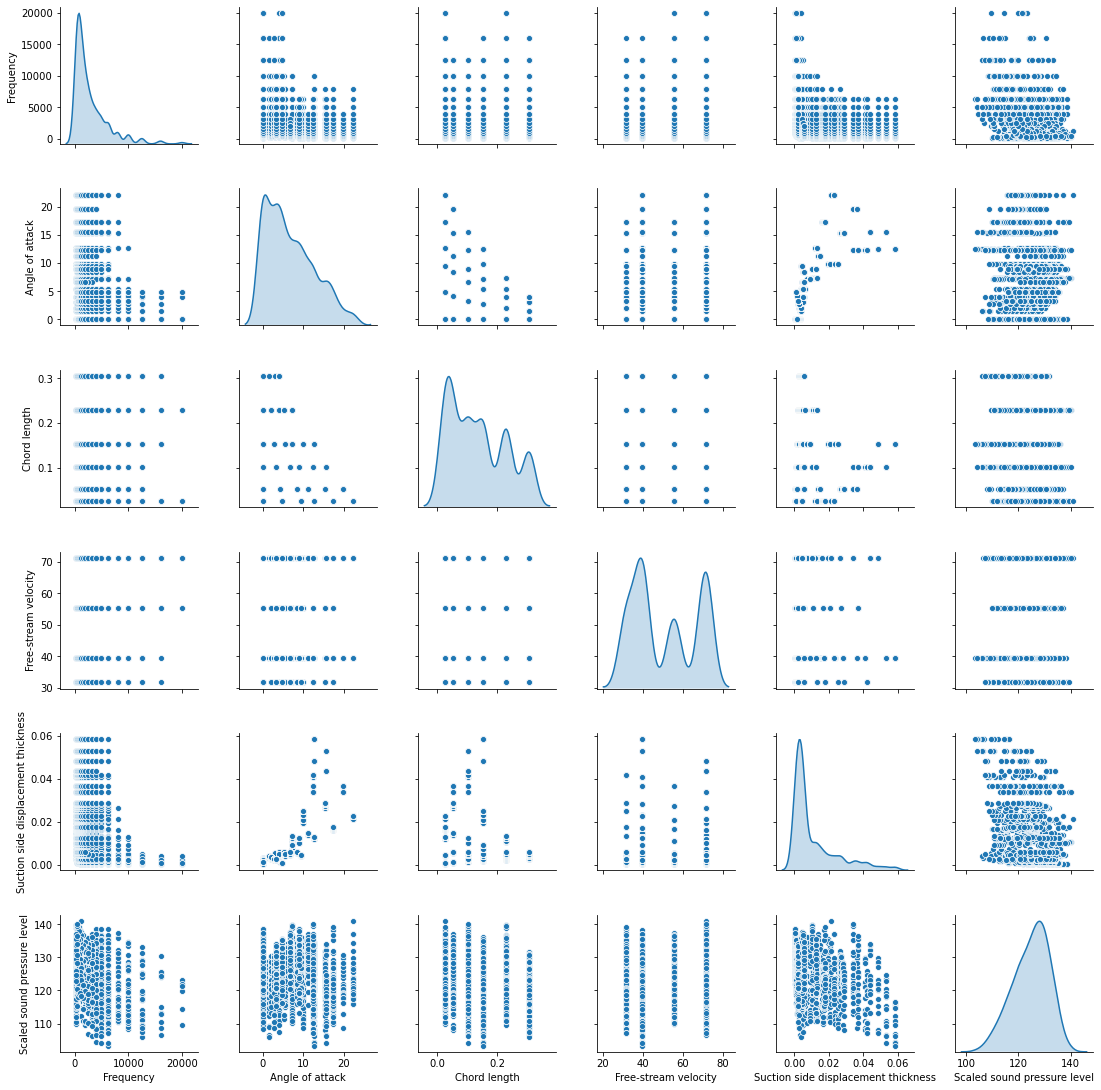

In [63]:
sns.pairplot(data=data, diag_kind='kde')

In [10]:
x = data.drop('Scaled sound pressure level',axis=1)
y = data['Scaled sound pressure level']

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
data_norm = scaler.fit_transform(x)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_norm, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

In [23]:
reg.score(x_train,y_train)

0.5034475371198581

In [24]:
reg.score(x_test, y_test)

0.5582979754897288

## Now dropping the column `Suction side displacement thickness `

In [26]:
x = data.drop(['Scaled sound pressure level','Suction side displacement thickness'],axis=1)
y = data['Scaled sound pressure level']

In [27]:
data_norm = scaler.fit_transform(x)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_norm, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

In [30]:
reg.score(x_train,y_train)

0.4763134758997891

In [31]:
reg.score(x_test,y_test)

0.5126998147396657

## Without scaling data

In [32]:
x = data.drop('Scaled sound pressure level',axis=1)
y = data['Scaled sound pressure level']

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

In [39]:
y_pred = reg.predict(x_test)

In [38]:
reg.score(x_train,y_train)

0.5034475371198581

In [36]:
reg.score(x_test,y_test)

0.5582979754897284

- MSE:
<br> Mean Squared Error: The mean of the squared difference between the data set's original and predicted values is known as the mean squared error. It calculates the residuals' variance. The MSE is equal to 0 when a model is error-free. Its value increases when model error does as well.
<br> $$ \sum \frac{(y-\hat{y})^2}{n} $$
- RMSE:
<br> Root Mean Squared Error: Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.
<br> $$ \sum \sqrt \frac{(y-\hat{y})^2}{n} $$
- MAE:
<br> Mean Absolute Error: The average of the absolute difference between the dataset's actual and anticipated values is represented by the Mean Absolute Error. It calculates the dataset's residuals' average.
<br> $$ \sum \frac{\vert(y-\hat{y})\vert}{n} $$

`MSE`

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

22.128643318247278

`RMSE`

In [46]:
mean_squared_error(y_test, y_pred,squared=False)

4.704109194974887

`MAE`

In [47]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3.6724145641788013

In [61]:
def calMSE(y_true,y_test, efficient = True):
    S = 0
    if efficient == True:
        diff = np.subtract(y_true,y_pred)
        sqr = np.square(diff)
        mean = sqr.mean()
        return mean
    else:
        for x,y in zip(y_true,y_pred):
            diff = abs(x-y)
            diff_sqr = diff**2
            S+=diff_sqr
           
        n = len(y_true)
        U = S/(n + 1e-5)#1e-5 for divide by zero error
        return U

In [55]:
calMSE(y_test,y_pred,efficient = True)

22.12864331824728

In [62]:
calMSE(y_test,y_pred,efficient = False)

22.128642583076434